In [24]:
import numpy as np
import pandas as pd
import geopandas as gpd

# Read Files

In [25]:
county_shapes = gpd.read_file('counties.geojson')

In [26]:
clean_zori = pd.read_csv("Clean_Zori - County_zori_uc_sfrcondomfr_sm_month.csv")

# Clean Files

In [27]:
filtered_county_shapes = county_shapes[['NAME', 'geometry']]

In [28]:
filtered_county_shapes

,NAME,geometry
0,San Francisco,"POLYGON ((-122.51198 37.77113, -122.46540 37.8..."
1,Suffolk,"POLYGON ((-71.19115 42.28306, -71.15689 42.330..."
2,Banner,"POLYGON ((-104.05283 41.69795, -103.37039 41.6..."
3,Vance,"POLYGON ((-78.49778 36.51448, -78.45728 36.541..."
4,Sherman,"POLYGON ((-102.16246 36.50033, -102.03234 36.5..."
...,...,...
3215,Pike,"POLYGON ((-91.46044 39.45072, -91.18288 39.598..."
3216,Adjuntas,"POLYGON ((-66.83274 18.22799, -66.81727 18.230..."
3217,Hamilton,"POLYGON ((-93.97158 42.55814, -93.49949 42.557..."
3218,Carroll,"POLYGON ((-95.09085 42.21040, -94.85841 42.209..."


In [29]:
filtered_county_shapes.rename(columns={'NAME': 'RegionName'}, inplace=True)

C:\Users\Samira\AppData\Local\Temp\ipykernel_14608\2793144476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_county_shapes.rename(columns={'NAME': 'RegionName'}, inplace=True)


In [30]:
clean_zori.dropna(subset=['2023-01-31'], inplace=True)

In [31]:
clean_zori.dropna(subset=['2015-01-31'], inplace=True)

In [32]:
clean_zori['RegionName'] = clean_zori['RegionName'].str.strip()

# Join Files

In [33]:
joined_df = pd.merge(clean_zori, filtered_county_shapes, on='RegionName')

In [34]:
df_clean = joined_df.drop_duplicates(subset=['RegionName'], keep='first')

In [35]:
gdf = gpd.GeoDataFrame(df_clean, geometry= 'geometry')

In [36]:
gdf.index = range(1, len(gdf) + 1)

<Axes: >

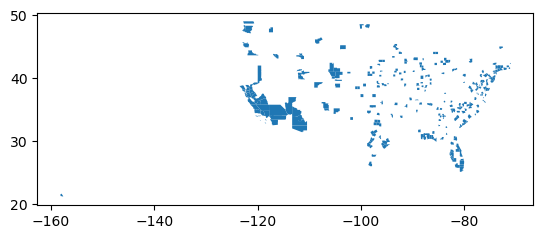

In [37]:
gdf.plot()

In [38]:
gdf

,RegionName,State,2015-01-31,2023-01-31,geometry
1,Los Angeles,CA,1778.812344,2740.416023,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847..."
2,Cook,IL,1478.571099,1921.004967,"POLYGON ((-83.57486 31.07813, -83.50996 31.205..."
3,Harris,TX,1203.141473,1565.700616,"POLYGON ((-95.84474 30.08891, -95.80333 30.090..."
4,Maricopa,AZ,954.608068,1812.313896,"POLYGON ((-113.33392 33.37742, -113.33333 33.5..."
5,San Diego,CA,1680.153232,2842.019136,"POLYGON ((-117.59619 33.38696, -117.57848 33.4..."
...,...,...,...,...,...
301,James City,VA,1279.369668,1811.262974,"POLYGON ((-76.89180 37.43263, -76.74198 37.467..."
302,Walton,FL,1025.814853,1950.873416,"POLYGON ((-86.38864 30.99453, -86.36497 30.994..."
303,Riley,KS,943.698576,1021.315339,"POLYGON ((-96.95872 39.56640, -96.80654 39.566..."
304,Liberty,GA,898.591085,1514.477576,"POLYGON ((-95.16590 30.34498, -94.85252 30.482..."
